# Gap junction coupled neurons driven by synaptic input

When a network is driven by continuous current injections each neuron receives a steady depolarisation, however when instead driven by more natural synaptic input, the neurons receive random input. Here the gap junctions are less able to synchronise the input.

This uses the same striatal network as before [FS_network_3.ipynb](FS_network_3.ipynb) but this time it is driven by synaptic input.

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

network_path = os.path.join("FS_network_4-synaptic")

In [2]:
# This should be 100 neurons to match previous run, setting it to 10 FS for speed while developing

from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=10, num_LTS=0, num_ChIN=0,
                    volume_type="cube", side_len=230e-6)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_network_4-synaptic/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 37/150 (10 neurons)
Processing hyper voxel : 67/150 (10 neurons)
Processing hyper voxel : 43/150 (10 neurons)
Processing hyper voxel : 36/150 (10 neurons)
Processing hyper voxel : 66/150 (9 neurons)
Processing hyper voxel : 73/150 (9 neurons)
Processing hyper voxel : 31/150 (9 neurons)
Processing hyper voxel : 61/150 (7 neurons)
Processing hyper voxel : 42/150 (7 neurons)
Processing hyper voxel : 30/150 (6 neurons)
Processing hyper voxel : 60/150 (6 neurons)
Processing hyper voxel : 72/150 (6 neurons)
Processing hyper voxel : 68/150 (5 neurons)
Processing hyper voxel : 38/150 (5 neurons)
Processing hyper voxel : 96/150 (4 neurons)
Processing hyper voxel : 97/150 (4 neurons)
Processing hyper voxel : 7/150 (3 neurons)
Processing hyper voxel : 103/150 (3 neurons)
Processing hyper voxel : 74/150 (2 neurons)
Processing hyper voxel : 2/150 (2 neurons)
Processing hyper voxel : 79/150 (2 neurons)
Processing hype

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 2243 out of total 2243 synapses
Read 494 out of total 494 gapJunctions


In [6]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/caldyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cap_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca

In [7]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file="example-FS-input-4.json",
                 verbose=False)
si.generate()

Loading 10 neurons with 275 synapses and 298 gap junctions
Writing spikes to FS_network_4-synaptic/input-spikes.hdf5


In [8]:
!mpiexec -n 2 snudda simulate FS_network_4-synaptic --time 1 --disableGJ --disableSyn --outputFile FS_network_4-synaptic/simulation/output-no-gj-no-syn.hdf5

numprocs=2
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=True, disable_synapses=True, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_4-synaptic/simulation/output-no-gj-no-syn.hdf5', path='FS_network_4-synaptic', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
!!! WE HAVE DISABLED GAP JUNCTIONS !!!
!!! SYNAPSES DISABLED
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=True, disable

Loading network info from FS_network_4-synaptic/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_4-synaptic/input-spikes.hdf5
Loading FS_network_4-synaptic/simulation/output-no-gj-no-syn.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_4-synaptic/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


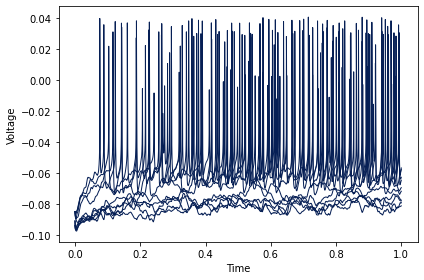

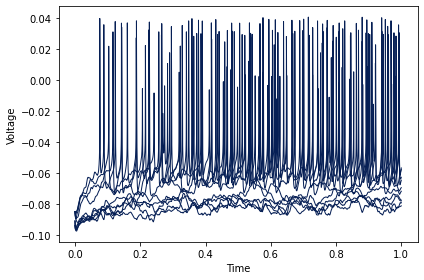

In [9]:
output_file = os.path.join(network_path, "simulation", "output-no-gj-no-syn.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

In [10]:
!mpiexec -n 2 snudda simulate FS_network_4-synaptic --time 1 --disableSyn --outputFile FS_network_4-synaptic/simulation/output-no-syn.hdf5

numprocs=2
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=True, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_4-synaptic/simulation/output-no-syn.hdf5', path='FS_network_4-synaptic', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
!!! SYNAPSES DISABLED
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=True, exportCoreNeuron=False, inp

Loading network info from FS_network_4-synaptic/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_4-synaptic/input-spikes.hdf5
Loading FS_network_4-synaptic/simulation/output-no-syn.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_4-synaptic/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


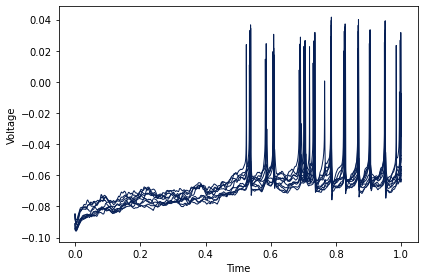

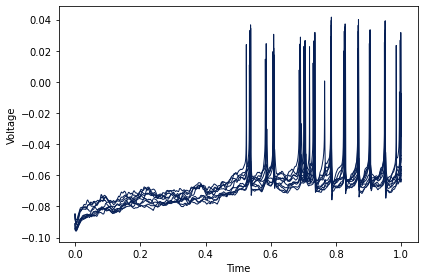

In [11]:
output_file = os.path.join(network_path, "simulation", "output-no-syn.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

In [12]:
!mpiexec -n 2 snudda simulate FS_network_4-synaptic --time 1 --disableGJ --outputFile FS_network_4-synaptic/simulation/output-no-gj.hdf5

numprocs=2
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=True, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_4-synaptic/simulation/output-no-gj.hdf5', path='FS_network_4-synaptic', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
!!! WE HAVE DISABLED GAP JUNCTIONS !!!
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=True, disable_synapses=False, exportCoreN

Loading network info from FS_network_4-synaptic/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_4-synaptic/input-spikes.hdf5
Loading FS_network_4-synaptic/simulation/output-no-gj.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_4-synaptic/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


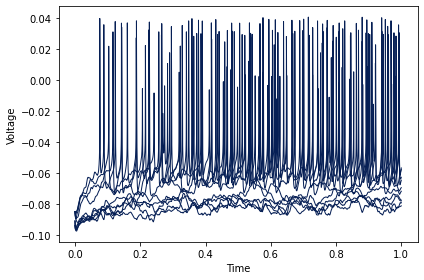

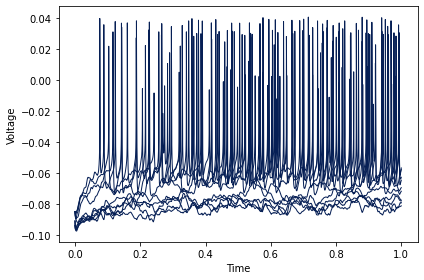

In [13]:
output_file = os.path.join(network_path, "simulation", "output-no-gj.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

In [14]:
!mpiexec -n 2 snudda simulate FS_network_4-synaptic --time 1 --outputFile FS_network_4-synaptic/simulation/output.hdf5

numprocs=2
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_4-synaptic/simulation/output.hdf5', path='FS_network_4-synaptic', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
Using input file FS_network_4-synaptic/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None

Loading network info from FS_network_4-synaptic/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_4-synaptic/input-spikes.hdf5
Loading FS_network_4-synaptic/simulation/output.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_4-synaptic/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


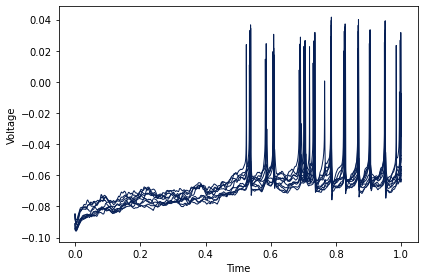

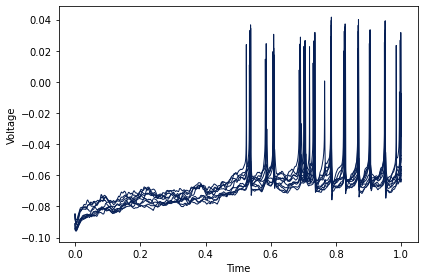

In [15]:
output_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

Loading FS_network_4-synaptic/simulation/output-no-gj-no-syn.hdf5


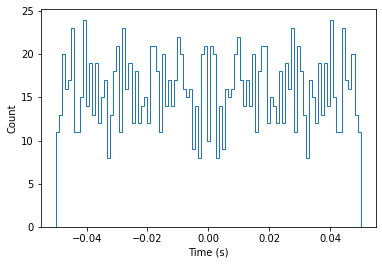

<Figure size 432x288 with 0 Axes>

In [16]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc0 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-gj-no-syn.hdf5"))
pcc0.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj-no-syn.png"))

Loading FS_network_4-synaptic/simulation/output-no-gj.hdf5


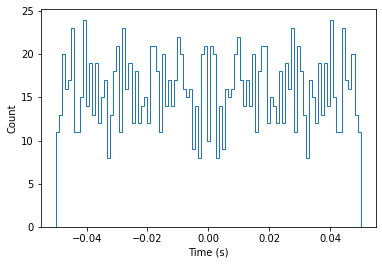

<Figure size 432x288 with 0 Axes>

In [17]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc1 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-gj.hdf5"))
pcc1.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj.png"))

Loading FS_network_4-synaptic/simulation/output-no-syn.hdf5


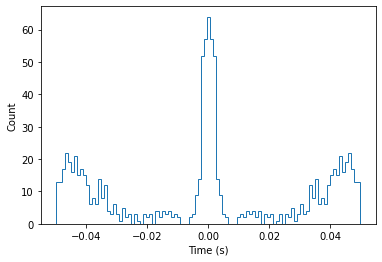

<Figure size 432x288 with 0 Axes>

In [18]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc1 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-syn.hdf5"))
pcc1.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-syn.png"))

Loading FS_network_4-synaptic/simulation/output.hdf5


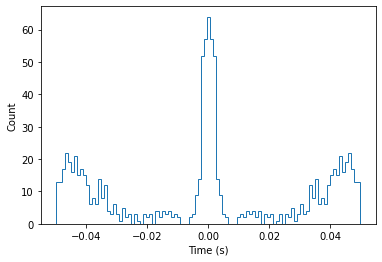

<Figure size 432x288 with 0 Axes>

In [19]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc2 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output.hdf5"))
pcc2.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr.png"))